# Goal
Optimizing conversion rate is likely the most common work of a data scientist, and rightfully so.
The data revolution has a lot to do with the fact that now we are able to collect all sorts of data
about people who buy something on our site as well as people who don't. This gives us a
tremendous opportunity to understand what's working well (and potentially scale it even further)
and what's not working well (and fix it).

The goal of this challenge is to build a model that predicts conversion rate and, based on the
model, come up with ideas to improve re]enue.

This challenge is significantly easier than all others in this collection. There are no dates, no
tables to join, no feature engineering required, and the problem is really straightforward.
Therefore, it is a great starting point to get familiar with data science take-home challenges

# Challenge Description
We have data about users who hit our site: whether they converted or not as well as some of
their characteristics such as their country, the marketing channel, their age, whether they are
repeat users and the number of pages visited during that session (as a proxy for site
activity/time spent on site).
Your project is to:
*   Predict conversion rate
*   Come up with recommendations for the product team and the marketing team to improve conversion rate

# Data
## Columns

*   country : user country based on the IP address
*   age : user age. Self-reported at sign-in step
*   new_user : whether the user created the account during this session or had already an
*   account and simply came back to the site
*   source : marketing channel source
*   Ads: came to the site by clicking on an advertisement
*   Seo: came to the site by clicking on search results
*   Direct: came to the site by directly typing the URL on the browser
*   total_pages_visited: number of total pages visited during the session. This is a proxy for
*   time spent on site and engagement during the session.
*   converted: this is our label. 1 means they converted within the session, 0 means they left without buying anything. The company goal is to increase conversion rate: # conversions/ total sessions


In [2]:
# read the csv file into data
import pandas as pd
data = pd.read_csv('conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
# check type of data
data.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [4]:
# look at data to find some weired behavior or wrong data.
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
data.groupby(['country']).count()

,age,new_user,source,total_pages_visited,converted
country,,,,,
China,76602,76602,76602,76602,76602
Germany,13056,13056,13056,13056,13056
UK,48450,48450,48450,48450,48450
US,178092,178092,178092,178092,178092


In [6]:
data.groupby(['source']).count()


,country,age,new_user,total_pages_visited,converted
source,,,,,
Ads,88740,88740,88740,88740,88740
Direct,72420,72420,72420,72420,72420
Seo,155040,155040,155040,155040,155040


a few quick observations:
* the site is probably a US site, although it does have large China user as well
* user base is pretty young
* conversion rate at around 3% is industry standard.  It makes sense.
* everything seems to make sense here except for max age 123 yrs.

In [7]:
# look at the age, and find 123 and 111 value seem unrealistic
data.groupby(['age']).count()

,country,new_user,source,total_pages_visited,converted
age,,,,,
17,7597,7597,7597,7597,7597
18,8466,8466,8466,8466,8466
19,9349,9349,9349,9349,9349
20,10156,10156,10156,10156,10156
21,10966,10966,10966,10966,10966
22,11701,11701,11701,11701,11701
23,12336,12336,12336,12336,12336
24,12960,12960,12960,12960,12960
25,13460,13460,13460,13460,13460


It is just 2 users. in this case, we can remove them, nothing will change, In general, depending on the problem, we can :
* remove the entire row saying we don't trust the data
* treat those values as NAs
* if there is a pattern, try to figure out what went wrong

removing the row is safest choice

You probably also want to emphasize in the text that wrong data is worrisome and can be an indicator of some bug in the logging code. Therefore, you’d like to talk to the software engineer who implemented the code to see if, perhaps, there are some bugs which affect the data significantly

In [8]:
data.loc[data['age']>79]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [17]:
# start to quickly investigate the variables and how their distribution differs for the two classes.
# This will help us understand whether there is any information in our data in the first place and get a sense of the data.
data = data.loc[data['age']<80]



In [24]:
data_country = data.groupby(['country']).mean()
data_source = data.groupby(['source']).mean()
data_age = data.groupby(['age'], as_index = False).mean()
data_new_user = data.groupby(['new_user']).mean()
data_total_pages_visit = data.groupby(['total_pages_visited'], as_index = False).mean()
print(data_age)

    age  new_user  total_pages_visited  converted
0    17  0.667500             5.317362   0.071607
1    18  0.672336             5.184266   0.066029
2    19  0.675794             5.108996   0.058616
3    20  0.675266             5.129874   0.057109
4    21  0.679920             5.068028   0.053985
5    22  0.683617             5.073754   0.053243
6    23  0.683528             5.009484   0.047990
7    24  0.684259             5.020139   0.045448
8    25  0.679941             4.916419   0.038782
9    26  0.685593             4.922260   0.039767
10   27  0.686595             4.871201   0.033513
11   28  0.681961             4.855031   0.032564
12   29  0.680534             4.885648   0.033621
13   30  0.687509             4.884497   0.028998
14   31  0.684852             4.841002   0.027461
15   32  0.688680             4.844525   0.024802
16   33  0.689652             4.808725   0.023989
17   34  0.687479             4.762884   0.021556
18   35  0.693401             4.743876   0.018394


<Figure size 720x504 with 0 Axes>

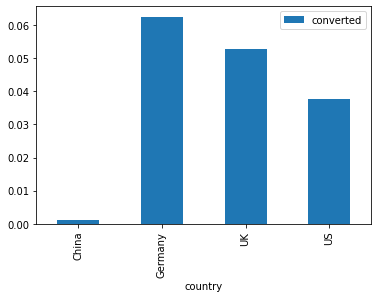

In [25]:
#Here it clearly looks like Chinese convert at a much lower rate than other countries.
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
data_country.plot.bar( y = 'converted')
plt.show()

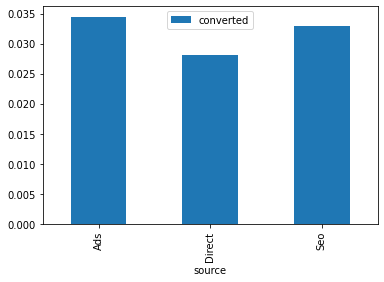

In [26]:
# bar plot for conversion rate for different source
data_source.plot.bar( y = 'converted')
plt.show()

<AxesSubplot:xlabel='new_user'>

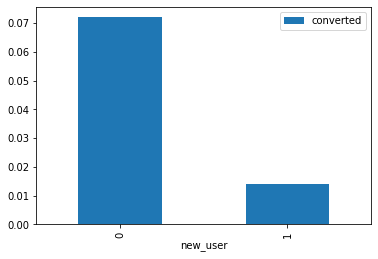

In [15]:
# bar plot for conversion rate for new and old user
data_new_user.plot.bar( y = 'converted')


<AxesSubplot:xlabel='age'>

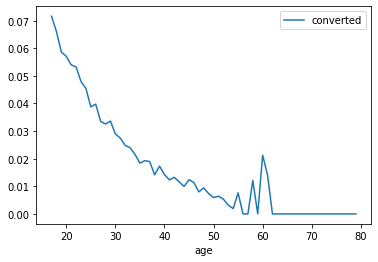

In [27]:
# line plot for conversion rate for different age
data_age.plot.line(x = 'age', y = 'converted')

<AxesSubplot:xlabel='total_pages_visited'>

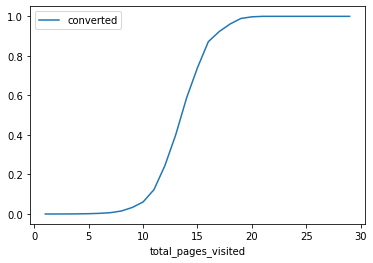

In [28]:
# Definitely spending more time on the site implies higher probability of conversion
data_total_pages_visit.plot.line(x = 'total_pages_visited', y = 'converted')

# Machine Learning
Build a model to predict conversion rate. The outcome is binary and care about insights to give product and marketing team some idea.

## Models
* Logistic regression
* decision trees
* rulefit
* random forest

## Example
I am going to pick a random forest to predict conversion rate. I pick a random forest cause: it usually
requires very little time to optimize it (its default params are often close to the best ones) and it is strong
with outliers, irrelevant variables, continuous and discrete variables. I will use the random forest to predict
conversion, then I will use its partial dependence plots and variable importance to get insights about how
it got information from the variables. Also, I will build a simple tree to find the most obvious user segments
and see if they agree with RF partial dependence plots.

In [215]:
# split data into train set and test set with 70% split
# build the forest with standard value for the 3 most important parameters (100 trees, trees as large as possible, 3 random variables selected at each split)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
train, test = train_test_split(data, test_size = 0.33)
train['country'].replace(['China', 'Germany', 'UK', 'US'], [0, 1, 2, 2], inplace = True)
train['source'].replace(['Ads', 'Direct', 'Seo'], [0, 1, 2], inplace = True)
test['country'].replace(['China', 'Germany', 'UK', 'US'], [0, 1, 2, 2], inplace = True)
test['source'].replace(['Ads', 'Direct', 'Seo'], [0, 1, 2], inplace = True)
train_feature = train.iloc[:,:5]
train_label = train.iloc[:,5]
test_feature = test.iloc[:,:5]
test_label = test.iloc[:,5]
print(test_feature)
test.groupby('converted').count()

        country  age  new_user  source  total_pages_visited
96014         2   31         1       2                    1
27296         2   21         1       0                    3
239267        2   43         1       2                    2
173067        0   34         1       0                    5
168026        2   38         0       0                    4
...         ...  ...       ...     ...                  ...
71004         2   18         1       2                   22
26458         0   29         1       1                    3
149953        2   24         1       1                    1
275565        0   34         0       0                    1
52681         2   40         1       1                    6

[104346 rows x 5 columns]


,country,age,new_user,source,total_pages_visited
converted,,,,,
0,100985,100985,100985,100985,100985
1,3361,3361,3361,3361,3361


In [216]:
rf = RandomForestClassifier(n_estimators = 100, oob_score =  True, random_state = 20)
rf.fit(train_feature, train_label)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=20)

In [217]:
#OOB error and test error is
print('OOB error:', rf.oob_score_)

OOB error: 0.9846355002548949


In [218]:
# make a predictions
predictions = rf.predict(test_feature)
print(rf.score(test_feature, test_label))


0.9853372434017595


In [219]:
#look at confusion matrix
#Indeed, 30% of conversions are predicted as "non conversion"
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_label, predictions)
print(conf)


[[100562    423]
 [  1107   2254]]


Text(0.5, 0, 'Random Forest Feature Importance')

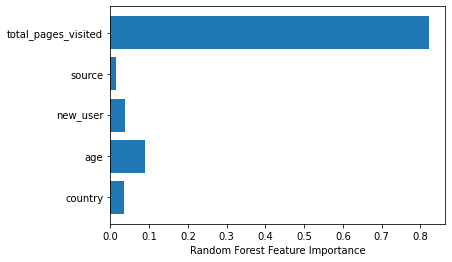

In [224]:
# look at Gini importance (or mean decrease impurity)
# To get the feature importances from the Random Forest model
plt.barh(train_feature.columns, rf.feature_importances_)
plt.xlabel("Random Forest Feature Importance")


Some conclusions and suggestions:
1. The site is working very well for young users. Definitely let’s tell marketing to advertise and use
marketing channel which are more likely to reach young people.
2. The site is working very well for Germany in terms of conversion. But the summary showed that
there are few Germans coming to the site: way less than UK, despite a larger population. Again,
marketing should get more Germans. Big opportunity.
3. Users with old accounts do much better. Targeted emails with offers to bring them back to the site
could be a good idea to try.
4. Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the
local culture, some payment issue or maybe it is just in English! Given how many users are based in
China, fixing this should be a top priority. Huge opportunity.
5. Maybe go through the UI and figure out why older users perform so poorly? From 30 y/o conversion
clearly starts dropping.
6. If I know someone has visited many pages, but hasn’t converted, she almost surely has high
purchase intent. I could email her targeted offers or sending her reminders. Overall, these are
probably the easiest users to make convert.
As you can see, conclusions usually end up being about:
1. tell marketing to get more of the good performing user segments
2. tell product to fix the experience for the bad performing ones

